
# CIFAR-10 Multiple Classes



In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

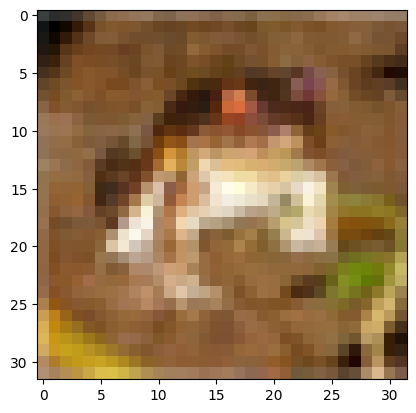

In [6]:
# FROG
plt.imshow(x_train[0])

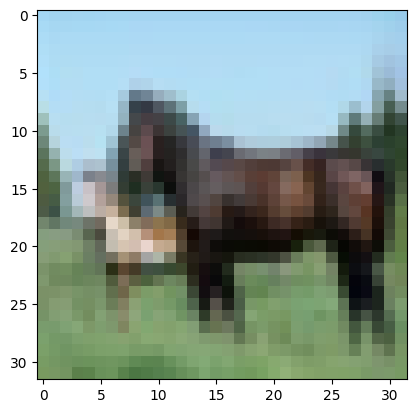

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
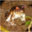

In [8]:
x_train[0]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 13s 6ms/step - loss: 1.5049 - accuracy: 0.4623 - val_loss: 1.3154 - val_accuracy: 0.5379
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1416 - accuracy: 0.6015 - val_loss: 1.3012 - val_accuracy: 0.5484
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9823 - accuracy: 0.6593 - val_loss: 1.0056 - val_accuracy: 0.6609
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8783 - accuracy: 0.6966 - val_loss: 1.0645 - val_accuracy: 0.6318
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7893 - accuracy: 0.7283 - val_loss: 0.9528 - val_accuracy: 0.6780
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7203 - accuracy: 0.7543 - val_loss: 0.9542 - val_accuracy: 0.6791
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6570 - accuracy: 0.7738 - val_loss: 0.9992 - val_accuracy

In [28]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.504866,0.46234,1.315417,0.5379
1,1.141606,0.60146,1.301229,0.5484
2,0.982290,0.65928,1.005627,0.6609
3,0.878314,0.69658,1.064529,0.6318
4,0.789292,0.72828,0.952841,0.6780


<Axes: >

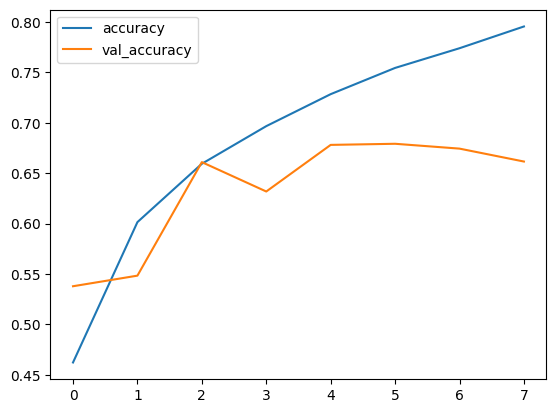

In [31]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

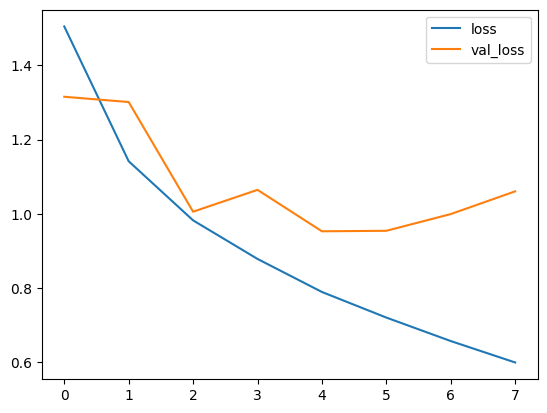

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.06051766872406, 0.6614999771118164]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

# Use predict to get probabilities and then argmax for class predictions
predictions_probs = model.predict(x_test)
predictions = np.argmax(predictions_probs, axis=1)

313/313 [==============================] - 1s 2ms/step


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.84      0.72      0.78      1000
           2       0.55      0.57      0.56      1000
           3       0.47      0.49      0.48      1000
           4       0.64      0.62      0.63      1000
           5       0.71      0.39      0.50      1000
           6       0.62      0.84      0.71      1000
           7       0.84      0.61      0.71      1000
           8       0.65      0.87      0.75      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[729,  11,  39,  12,  17,   3,  15,   5, 139,  30],
       [ 33, 724,   8,  10,   4,   3,  20,   0,  85, 113],
       [ 81,   9, 574,  73,  62,  27, 101,  19,  34,  20],
       [ 32,  12, 107, 493,  74,  60, 131,  22,  45,  24],
       [ 24,   8,  92,  55, 617,  14, 120,  31,  28,  11],
       [ 19,   7, 104, 278,  45, 392,  81,  35,  25,  14],
       [ 12,   4,  38,  50,  27,   3, 840,   3,  16,   7],
       [ 31,  16,  55,  54, 106,  49,  22, 611,  15,  41],
       [ 59,   8,  10,   8,   7,   3,  12,   0, 867,  26],
       [ 38,  61,  12,  13,   6,   2,  22,   5,  73, 768]])

<Axes: >

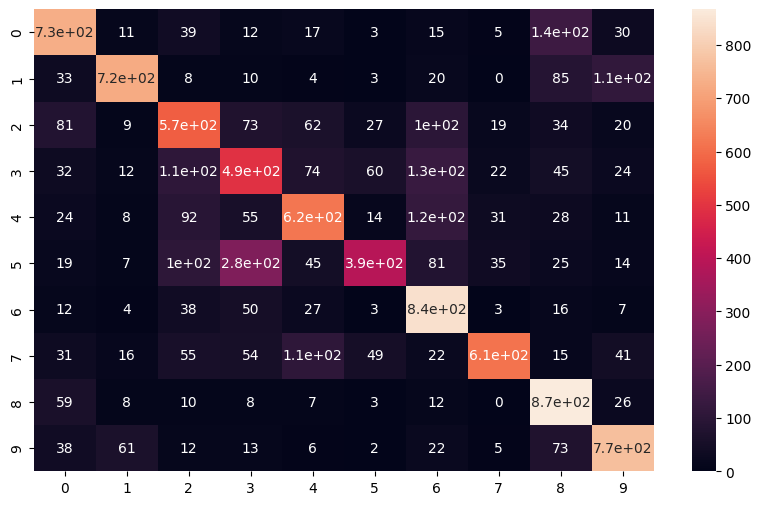

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [54]:
my_image = x_test[787]

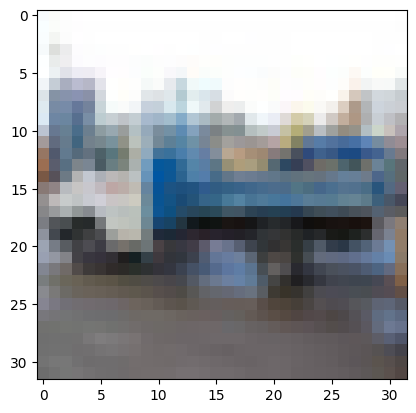

In [55]:
plt.imshow(my_image)

In [61]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# SHAPE --> (num_images,width,height,color_channels)
predictions = np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)
print(predictions) # prints the predicted class index
predicted_class = class_names[predictions[0]]
print(predicted_class)


1/1 [==============================] - 0s 26ms/step
[9]
truck
